实验

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import numpy as np  


def evaluate_classifier_multiple_times(classifier, X, y, n_iterations=10, eps=None, min_samples=None):  
    all_accuracies = []  
    all_f1_scores = []  
  
    for iteration in range(n_iterations):  
        # 设置十折交叉验证，每次使用不同的random_state  
        kf = KFold(n_splits=10, shuffle=True, random_state=42 + iteration * 10)  # 使用迭代次数作为随机种子  
        scores = []  
        f1_scores_iter = []  
  
        # 遍历交叉验证的每一折  
        for fold, (train_index, test_index) in enumerate(kf.split(X)):  
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
  
            # 将pandas读取的数据转化为list形式
            X_train = X_train.values.tolist()  
            y_train = y_train.values.tolist()  
            X_test = X_test.values.tolist()  
            y_test = y_test.values.tolist()  
           
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            
            dbscan = classifier.DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(X_train,y_train)
            y_pred=dbscan.predict(X_test)
                
            # print('y_pred',y_pred,len(y_pred))
            # print('y_test',y_test,len(y_test))
            accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)  
            f1 = f1_score(y_test, y_pred, average='macro')  
            scores.append(accuracy)  
            f1_scores_iter.append(f1)  
  
        mean_accuracy = np.mean(scores)  
        std_accuracy = np.std(scores)  
        mean_f1 = np.mean(f1_scores_iter)  
        print(f'第{iteration}次',mean_accuracy)  
        all_accuracies.append(mean_accuracy)  
        all_f1_scores.append(mean_f1)  
  
        # print(f"Iteration {iteration + 1}: Mean Accuracy = {mean_accuracy:.4f}, Std Accuracy = {std_accuracy:.4f}, Mean F1 Score = {mean_f1:.4f}")  

    overall_mean_accuracy = np.mean(all_accuracies)  
    overall_std_accuracy = np.std(all_accuracies)  
    overall_mean_f1 = np.mean(all_f1_scores)  
  
    return overall_mean_accuracy, overall_std_accuracy, overall_mean_f1  
  
# # 示例调用  
# # classifier_instance = YourClassifier()  # 替换为你的分类器实例  
# # X = your_X_data  # 替换为你的特征数据  
# # y = your_y_data  # 替换为你的标签数据  
# # k = your_k_value  # 替换为你的k值  
# # evaluate_classifier_multiple_times(classifier_instance, X, y, k)


系数指标

当前数据集data\bal.xls
Silhouette Score: 0.07164248129200416


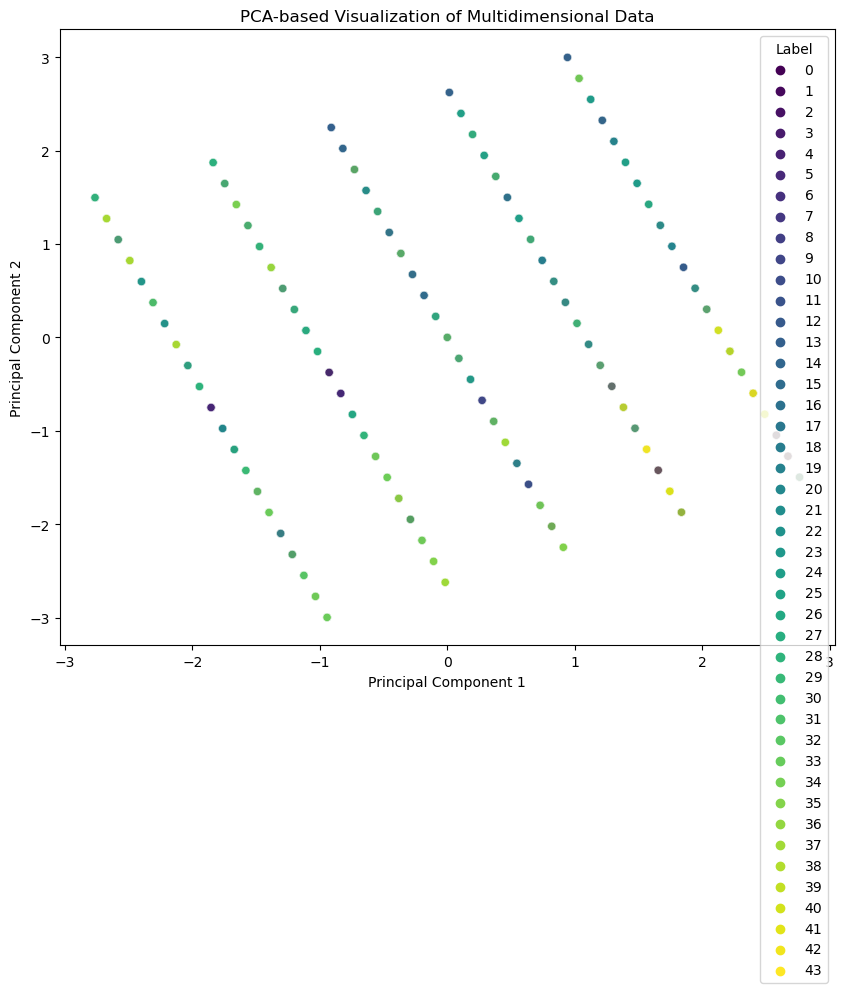

当前数据集data\gla.xls
Silhouette Score: 0.13588758635503237


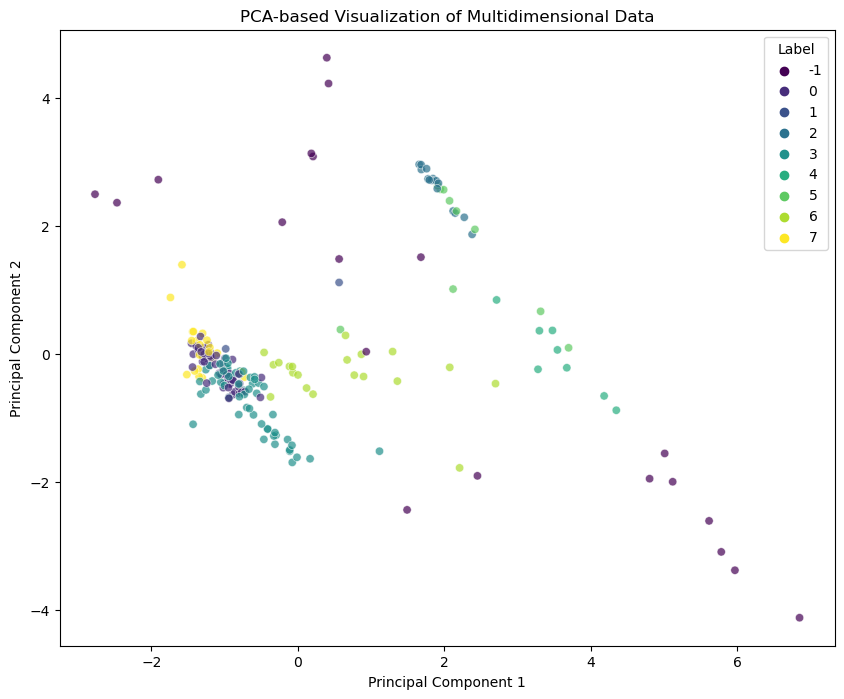

当前数据集data\hay.xls
Silhouette Score: 0.21519232045032602


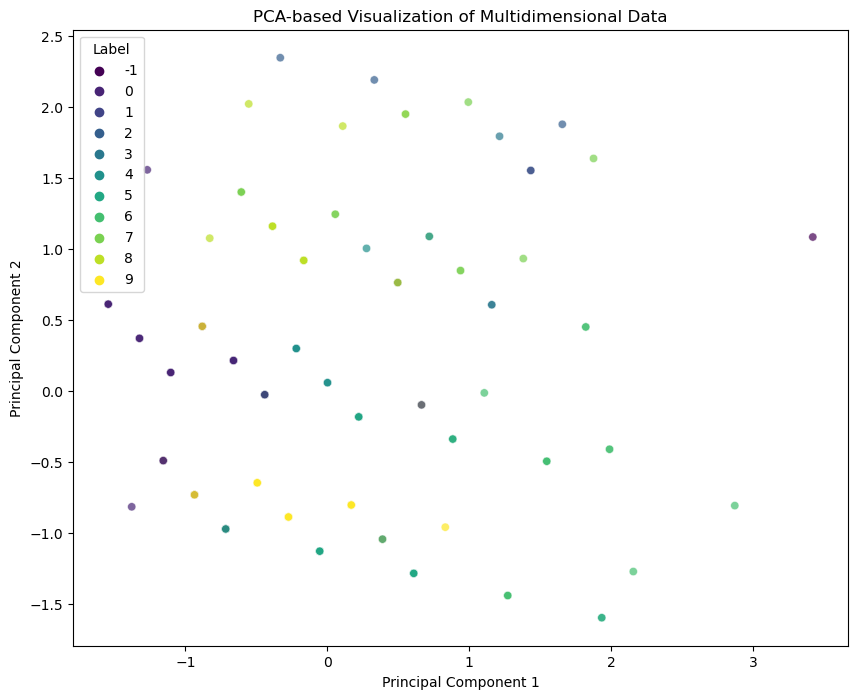

当前数据集data\iri.xls
Silhouette Score: 0.5318630032533668


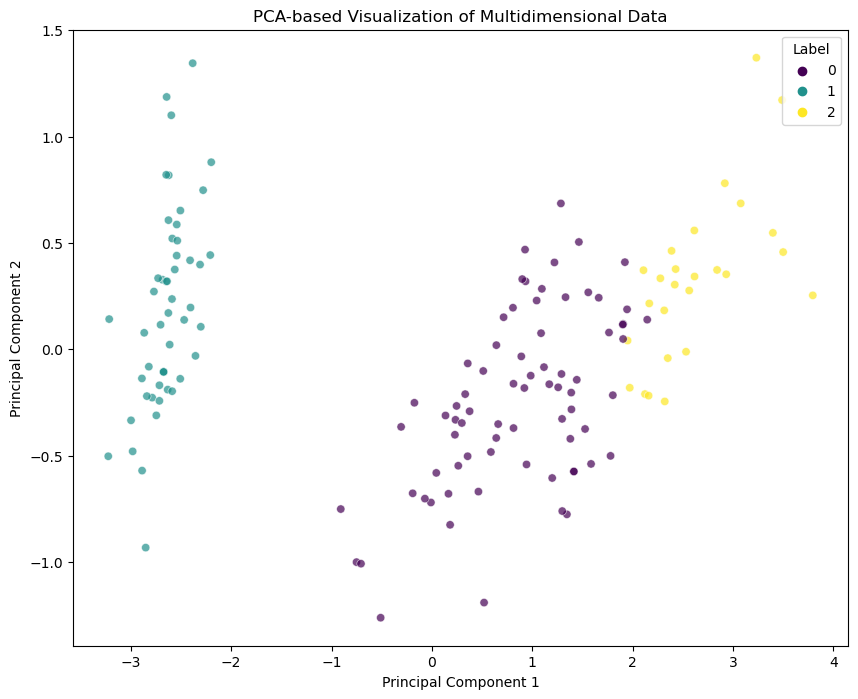

当前数据集data\new.xls
Silhouette Score: -0.36528445940292087


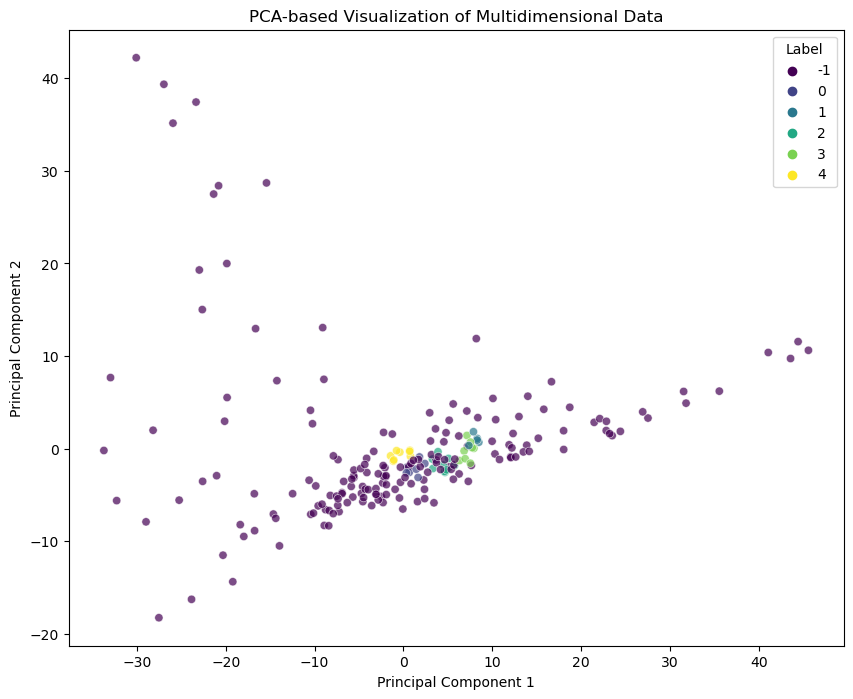

当前数据集data\win.xls


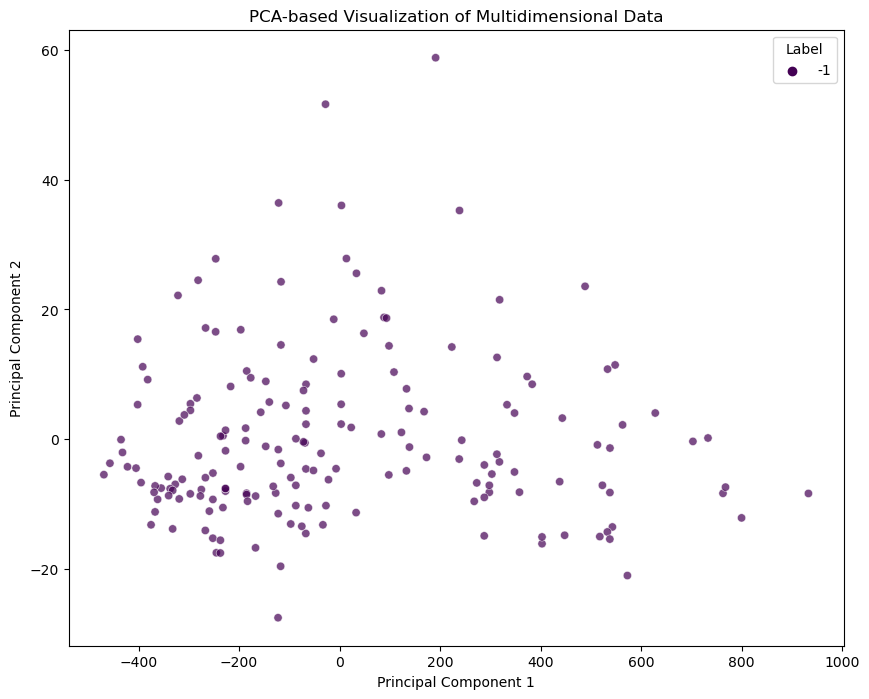

当前数据集data\zoo.xls
Silhouette Score: 0.20860471421193783


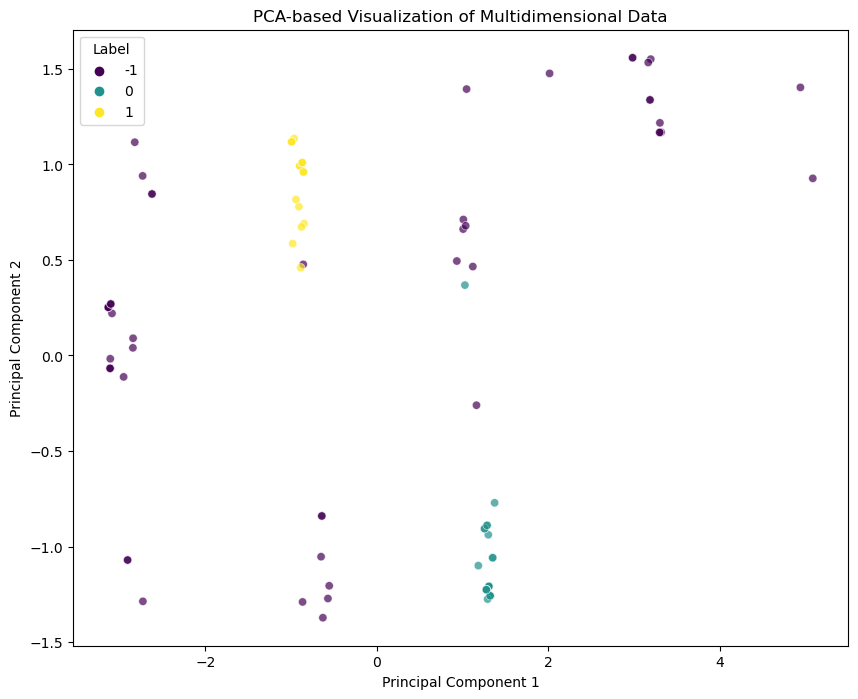

In [6]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
from package_py import DBSCAN11

    
# file_paths =[ "data\\hay.xls"]  # 实际文件路径
file_paths =[ "data\\bal.xls", "data\\gla.xls", "data\\hay.xls", "data\\iri.xls", "data\\new.xls", "data\\win.xls", "data\\zoo.xls"]  # 实际文件路径
# mean_accuracys=[]
for i in range(len(file_paths)):
    file_path=file_paths[i]
    print(f"当前数据集{file_path}")
    data = pd.read_excel(file_path, header=None)  
    # 将数据分为特征和标签  
    X = data.iloc[:, :-1]  # 前n列是特征  
    y = data.iloc[:, -1]   # 最后一列是分类标签  
    
    # 数据标准hua
    scaler = StandardScaler()  
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    dbscan = DBSCAN11.DBSCAN(eps=2.0,min_samples=None)
    dbscan.fit(X,y)
    

In [23]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
from package_py import DBSCAN11

    
file_paths =[ "data\\hay.xls"]  # 实际文件路径
# file_paths =[ "data\\bal.xls", "data\\gla.xls", "data\\hay.xls", "data\\iri.xls", "data\\new.xls", "data\\win.xls", "data\\zoo.xls"]  # 实际文件路径
# mean_accuracys=[]
for i in range(len(file_paths)):
    file_path=file_paths[i]

    data = pd.read_excel(file_path, header=None)  
    # 将数据分为特征和标签  
    X = data.iloc[:, :-1]  # 前n列是特征  
    y = data.iloc[:, -1]   # 最后一列是分类标签  
    
    # 数据标准hua
    scaler = StandardScaler()  
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # # 计算标准化后数据的标准差
    # std_dev = np.std(X_scaled_df, axis=0).mean()  # 计算每个特征的标准差，然后取平均
    # print("特征标准差",std_dev)
    # 标准化后数据的标准差均为1
    mean_accuracy,std_accuracy,f1=evaluate_classifier_multiple_times(DBSCAN11,X_scaled_df,y,10,eps=2.2)   #eps=3,min_samples=5
    # mean_accuracys.append(mean_accuracy)

    # 使用 f-string 格式化输出  
    print(f'{file_path} \n  mean_accuracy: {mean_accuracy:.3f} std_accuracy: {std_accuracy:.3f} f1: {f1:.3f}')
    
    # # 找寻最优参数
    # for eps in range(50,100,1):
    #     print('eps',eps/10)
    #     eps/=10
    #     mean_accuracy,std_accuracy,f1=evaluate_classifier_multiple_times(DBSCAN11,X_scaled_df,y,1,eps=eps)   #eps=3,min_samples=5
    #     # mean_accuracys.append(mean_accuracy)

    #     # 使用 f-string 格式化输出  
    #     print(f'{file_path} \n  mean_accuracy: {mean_accuracy:.3f} std_accuracy: {std_accuracy:.3f} f1: {f1:.3f}')



第0次 0.45
第1次 0.40625
第2次 0.475
第3次 0.49375
第4次 0.425
第5次 0.43125
第6次 0.475
第7次 0.45625
第8次 0.50625
第9次 0.45625
data\hay.xls 
  mean_accuracy: 0.457 std_accuracy: 0.030 f1: 0.407


In [ ]:
import numpy as np
from collections import Counter

class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None
        self.cluster_ids_ = []  #每个簇中的坐标点的索引
        self.n_clusters_ = 0  #簇标记
        self.core_samples_ = []
        self.cluster_centers_ = [] #聚类中心的坐标点
        self.cluster_labels_ = []  #簇标签
    def fit(self, X, y=None):
        # 变X为np.array
        X = np.array(X)
        # 样本数
        n_samples = X.shape[0]
        self.labels_ = -1 * np.ones(n_samples, dtype=int)  #初始化所有点的标签为-1
        def distance(x,X):
            return [np.sqrt(np.sum((x - X[i])**2)) for i in range(n_samples)]
        # 确定核心样本点
        # 计算所有点之间的欧氏距离
        neighbors_dist = [distance(X[i],X) for i in range(n_samples)]
        '''
        for i in range(n_samples):
            print(neighbors_cha[i])
        输入：X = np.array([
            [1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]
            ])
        输出：
            [0.0, 1.0, 1.4142135623730951, 8.602325267042627, 9.219544457292887, 81.60882305241266]
            [1.0, 0.0, 1.0, 7.810249675906654, 8.48528137423857, 81.32035415564789]
            [1.4142135623730951, 1.0, 0.0, 7.211102550927978, 7.810249675906654, 80.36168241145776]
            [8.602325267042627, 7.810249675906654, 7.211102550927978, 0.0, 1.0, 74.95331880577403]
            [9.219544457292887, 8.48528137423857, 7.810249675906654, 1.0, 0.0, 73.97972695272672]
            [81.60882305241266, 81.32035415564789, 80.36168241145776, 74.95331880577403, 73.97972695272672, 0.0]
        '''
        def tell_diatance_eps(distances):
            # 接收一个距离列表，返回一个列表，列表中元素为1表示距离小于eps，0表示距离大于eps
            return [1 if x_dist < self.eps else 0 for x_dist in distances]
        # 返回一个列表，列表中元素为1表示距离小于eps，0表示距离大于eps，大小为样本数，样本数。所以空间复杂度为n**2，有点大
        sample_core = [tell_diatance_eps(neighbors_dist[i]) for i in range(n_samples)]
        '''
        print(sample_core)   eps=1.5
        输出：
        [[1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 1]]
        '''
        # 计邻域半径内的点的数量（不含自身）
        sample_core_num = [sum(sample_core[i])-1 for i in range(n_samples)]
        # 记录核心样本点的索引
        self.core_samples_ = [i for i in range(n_samples) if sample_core_num[i] >= self.min_samples]
        # 模拟随机选取的核心样本点
        # 创建一个随机数生成器实例，并设置种子
        rng = np.random.RandomState(42)
        
        # 使用这个随机数生成器实例来打乱数组
        self.core_samples_random = rng.permutation(self.core_samples_)

        def diffusion(core_sample_index):
            print(core_sample_index)
            # 返回扩散的样本点的索引
            kuosan_x_sample_index = [i for i, x in enumerate(sample_core[core_sample_index]) if x == 1]
    
            for index in kuosan_x_sample_index:
                self.cluster_ids_[-1].append(index)
                self.labels_[index]=self.n_clusters_
                # 如果是核心样本点，并且未被划分进簇，继续扩散
                if index in self.core_samples_ and self.labels_[index]== -1:
                    diffusion(index) 

        for core_sample_index in self.core_samples_random:
            # 如果核心样本点已经归簇类，跳过
            if self.labels_[core_sample_index]!= -1:
                continue
            # 记录簇中心
            self.cluster_centers_.append(X[core_sample_index])
            # 进行扩散
            self.cluster_ids_.append([])
            diffusion(core_sample_index)
            print('qian',self.cluster_ids_)
            self.cluster_ids_[-1]=list(set(self.cluster_ids_[-1]))
            print(self.cluster_ids_)
            self.n_clusters_+=1
            print('jieguo',self.labels_)

        # 后处理：根据簇中原始标签的多数投票来确定簇标签  
        # 对于每个簇，统计其中原始标签的数量
        for cluster_id, cluster_indices in enumerate(self.cluster_ids_):
            cluster_labels=[]
            if len(cluster_indices) > 0:
                for index in cluster_indices:
                    cluster_labels.append(y[index])
            # 找到数量最多的标签
            most_common_label = Counter(cluster_labels).most_common(1)[0][0]
            self.cluster_labels_.append(most_common_label)
     
        # 返回样本点簇划分情况与各个簇的中心点坐标和簇标签
        return self.labels_,self.cluster_centers_,self.cluster_labels_
    
    # 通过计算每个检测点与所有簇中心的距离，找到距离最近的簇中心，将该检测点归为该簇中心所属的簇。或是找寻与训练集中所有点的距离，取最近的点所在簇的簇标签。
    def predict(self, X):
        preds=[]
        for x in X:
            dists=[np.sqrt(np.sum((x - center)**2)) for center in self.cluster_centers_]
            print(dists)
            # 找到距离最近的簇中心
            min_dist_index = np.argmin(dists)
            # 将该检测点归为该簇中心所属的簇
            preds.append(self.cluster_labels_[min_dist_index])
        print('preds',preds)
        return preds



    #     # neighbors_cha = [neighbors_cha[i][j]**2 for i in range(n_samples) for j in range(len(neighbors_cha[i]))]
    #     # print(neighbors_cha.shape())
    #     # neighbors_dist= [sum(neighbors_cha[i]) for i in range(n_samples)]
    #     # print(neighbors_dist)
    #     def region_query(idx):
    #         # Find all points within eps-neighborhood of the point with index idx
    #         distances = np.linalg.norm(X - X[idx], axis=1)
    #         return np.where(distances < self.eps)[0]

    #     def expand_cluster(idx, cluster_id):
    #         # Expand cluster from seed point idx with given cluster_id
    #         seeds = deque([idx])
    #         self.labels_[idx] = cluster_id
    #         while seeds:
    #             point_idx = seeds.popleft()
    #             neighbors = region_query(point_idx)
    #             if len(neighbors) >= self.min_samples:
    #                 for neighbor_idx in neighbors:
    #                     if self.labels_[neighbor_idx] == -1:  # If noise, assign to current cluster
    #                         self.labels_[neighbor_idx] = cluster_id
    #                         seeds.append(neighbor_idx)

    #     for i in range(n_samples):
    #         if self.labels_[i] != -1:
    #             continue
    #         neighbors = region_query(i)
    #         # print(neighbors)
    #         if len(neighbors) < self.min_samples:
    #             self.labels_[i] = -1  # Mark as noise
    #         else:
    #             # Start a new cluster
    #             self.n_clusters_ += 1
    #             cluster_id = len(self.cluster_ids_)  # Use index as cluster_id (will be corrected later)
    #             self.cluster_ids_.append([])  # Placeholder for labels in this cluster
    #             expand_cluster(i, cluster_id)
    #             # Append the actual index of this cluster_id in self.cluster_ids_ (for later use)
    #             # but for now, just use the length of self.cluster_ids_ as a placeholder

    #     # Post-processing: Assign cluster labels based on majority voting of original labels
    #     if y is not None:
    #         new_labels = np.zeros_like(self.labels_)
    #         for cluster_id, labels_in_cluster in enumerate(self.relabel_clusters(y, self.labels_)):
    #             most_common_label, _ = Counter(labels_in_cluster).most_common(1)[0]
    #             for idx in np.where(self.labels_ == cluster_id)[0]:
    #                 new_labels[idx] = most_common_label
    #         self.labels_ = new_labels

    # def relabel_clusters(self, y, dbscan_labels):
    #     # Helper function to extract labels for each cluster based on DBSCAN labels
    #     clusters = {i: [] for i in range(-1, len(self.cluster_ids_))}  # -1 for noise
    #     for idx, label in enumerate(dbscan_labels):
    #         clusters[label].append(y[idx]) if label != -1 else clusters[-1].append(y[idx])
    #     # Remove noise cluster (if any) and return only non-noise clusters
    #     return [clusters[i] for i in clusters if i != -1]

    # def predict(self):
    #     # Return the (possibly relabeled) cluster labels for each point
    #     return self.labels_

# Example usage
if __name__ == "__main__":
    # Generate some synthetic data (for illustration purposes)
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    X, y_true = make_blobs(n_samples=5, centers=4, cluster_std=0.60, random_state=0)
    # Shuffle true labels to simulate that they are not perfectly aligned with clusters
    np.random.shuffle(y_true)
    y = y_true.copy()  # Use shuffled labels for "input" labels
    X = np.array([
    [1, 2], [2, 2], [2, 3],
    [8, 7], [8, 8], [25, 80]
])
    y=[1,1,2,3,3,4]
    # Fit DBSCAN
    dbscan = DBSCAN(eps=1.5, min_samples=1)
    dbscan.fit(X,y)
    print(dbscan.predict([[2,2],[3,4],[7,8]]))

1
qian [[0, 1, 2]]
[[0, 1, 2]]
jieguo [ 0  0  0 -1 -1 -1]
4
qian [[0, 1, 2], [3, 4]]
[[0, 1, 2], [3, 4]]
jieguo [ 0  0  0  1  1 -1]
[0.0, 8.48528137423857]
[2.23606797749979, 6.4031242374328485]
[7.810249675906654, 1.0]
preds [1, 1, 3]
[1, 1, 3]


In [1]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance_to(self, other):
        # 计算两个点之间的欧几里得距离
        return ((self.x - other.x) ** 2 + (self.y - other.y) ** 2) ** 0.5

class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None
        self.cluster_centers_ = []
        self.n_clusters_ = 0

    def fit(self, X):
        # X应该是一个列表，其中每个元素都是一个Point对象
        self.labels_ = [-1] * len(X)  # 初始化所有点为噪声（-1）
        self.n_clusters_ = 0
        cluster_id = -1

        def region_query(idx):
            # 找到点idx的ε-邻域内的所有点
            return [i for i, point in enumerate(X) if X[idx].distance_to(point) < self.eps]

        def expand_cluster(idx):
            # 扩展簇
            nonlocal cluster_id
            seeds = [idx]
            self.labels_[idx] = cluster_id
            while seeds:
                point_idx = seeds.pop(0)
                neighbors = region_query(point_idx)
                if len(neighbors) >= self.min_samples:
                    for neighbor_idx in neighbors:
                        if self.labels_[neighbor_idx] == -1:  # 如果是噪声点，则加入当前簇
                            self.labels_[neighbor_idx] = cluster_id
                            seeds.append(neighbor_idx)
                        elif 0 <= self.labels_[neighbor_idx] < cluster_id:  # 如果属于其他已存在的簇，则合并簇
                            for k in range(len(X)):
                                if self.labels_[k] == self.labels_[neighbor_idx]:
                                    self.labels_[k] = cluster_id

                # 如果没有新的点被加入到簇中，则递减cluster_id（用于下一个可能的簇）
                # 注意：这里的逻辑与scikit-learn的DBSCAN不完全一致，因为scikit-learn在合并簇时不会立即递减cluster_id
                # 但为了简化实现，我们在这里采用了这种策略。在实际应用中，可能需要更复杂的簇合并逻辑。
                # 另外，由于我们在这里没有显式地存储簇中心，所以合并簇的操作只是简单地重新标记点的标签。

            # 递增cluster_id以准备下一个新簇的分配
            cluster_id += 1
            # 但在实际递增之前，我们需要检查是否成功扩展了簇（即是否有新的点被加入到簇中）
            # 由于我们在循环内部没有维护这个状态，我们在这里采用一个简化的策略：
            # 每次调用expand_cluster时都递增cluster_id，并在最后根据实际的簇数量进行调整
            # 这意味着我们可能会分配一些未使用的cluster_id，但这不会影响最终结果的正确性。

        for i in range(len(X)):
            if self.labels_[i] != -1:
                continue
            neighbors = region_query(i)
            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1  # 标记为噪声
            else:
                # 开始一个新的簇
                self.n_clusters_ += 1  # 增加簇的数量（注意：这里可能会多计一些，因为上面提到的cluster_id问题）
                cluster_id = len(self.labels_)  # 重新设置cluster_id（但这里我们采用简化的递增策略，所以实际上不需要这一步）
                # 但由于我们采用了简化的递增策略，并且不在此处立即调整cluster_id，
                # 我们只需要确保在扩展簇时传递一个唯一的标识符（即递增的cluster_id）。
                # 因此，上面的cluster_id重置是不必要的，我们可以直接调用expand_cluster。
                expand_cluster(i)  # 扩展簇（并隐式地递增cluster_id）

        # 由于我们可能分配了一些未使用的cluster_id，我们需要根据实际的簇数量来调整它们
        # 但在这个简化实现中，我们省略了这个步骤，因为self.n_clusters_只是给出了实际簇数量的一个上限（可能包含未使用的cluster_id）
        # 而在预测时，我们只关心标签的值是否大于0（表示属于某个簇），而不关心具体的cluster_id是多少。

        # 注意：为了完全遵循scikit-learn的接口，我们可能需要添加额外的逻辑来正确设置self.cluster_centers_
        # 和调整self.n_clusters_以反映实际的簇数量（即去除未使用的cluster_id）。
        # 但在这个实现中，我们为了简化而省略了这些步骤。

    def predict(self):
        # 返回每个点的簇标签
        return self.labels_

# 示例用法
points = [Point(1, 2), Point(2, 2), Point(2, 3),
          Point(8, 7), Point(8, 8), Point(25, 80)]
eps = 3
min_samples = 2

dbscan = DBSCAN(eps, min_samples)
dbscan.fit(points)
labels = dbscan.predict()
print("Cluster labels:", labels)

Cluster labels: [6, 6, 6, 6, 6, -1]
